In [2]:
import seaborn as sns; sns.set()

#Chargement du dataset
iris = sns.load_dataset('iris')

#Isoler les features et la variable cible
X = iris.drop('species', axis='columns')
Y = iris['species'].astype('category').cat.codes

In [13]:
#Séparer les données entre le TRAINING set et le TEST set
from sklearn.model_selection import train_test_split
splits = train_test_split(
    X,
    Y,
    train_size=0.3,
    stratify=Y,
    random_state=2
)

X_train, X_test, Y_train, Y_test = splits

In [14]:
from sklearn.neighbors import KNeighborsClassifier as KNN
#Créer un modèle de knn
knn = KNN(n_neighbors=1)
#Entrainer le modèle
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
#Méthode de calcul de l'accuracy de la prédiction
def accuracy(preds, target):
    return (preds == target).sum() / len(target)

In [16]:

#Faire une prédiction et calculer l'accuracy
predictions = knn.predict(X_test)
print(accuracy(predictions, Y_test))

0.9523809523809523


# Utilisation de Predict Proba

In [17]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# On isole une iris
one_iris = X_test.iloc[[44]]
# On affiche le resultat de predict proba
print(knn.predict_proba(one_iris))


[[0. 1. 0.]]


In [18]:
from sklearn.metrics import confusion_matrix
#labels = iris['species'].unique()
labels = range(3)
cm_test = confusion_matrix(predictions, Y_test, labels=labels)
cm_test

array([[35,  0,  0],
       [ 0, 34,  4],
       [ 0,  1, 31]])

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
labels = iris['species'].unique()
def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True, cmap="hot")
    plt.xlabel("Predictions")
    plt.ylabel("Ytrue")
    plt.show()

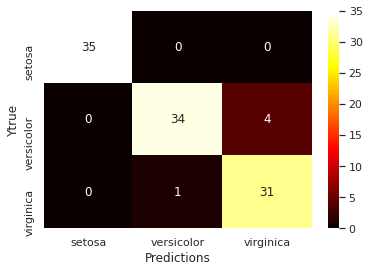

In [20]:
show_cm(cm_test, labels)

In [21]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc = RFC()

rfc.fit(X_train, Y_train)

RandomForestClassifier()

0.9428571428571428
